In [26]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections  
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [27]:
url = f"https://api.opendota.com/api/teams"
response = requests.get(url)
teams_data = response.json()

In [28]:
heroic_id = []
for teams in teams_data: 
    if teams['name'] == 'HEROIC': 
        heroic_id = teams['team_id']
        print(heroic_id)

9303484


In [29]:
def team_info(heroic_id):
    url = f"https://api.opendota.com/api/teams/{heroic_id}"
    response = requests.get(url)
    return response.json()

In [30]:
def win_rate(heroic_id):
    team_data = team_info(heroic_id)
    win = team_data['wins']
    losses = team_data['losses']
    total = win + losses
    win_rate = (win / total) * 100 if total > 0 else 0
    return round(win_rate, 1)
print(f"Heroic has a winrate of {win_rate(heroic_id)}%")

Heroic has a winrate of 54.0%


In [31]:
def get_matches(heroic_id):
    url = f"https://api.opendota.com/api/teams/{heroic_id}/matches"
    response = requests.get(url)
    matches = response.json()
    return matches[:4]

In [32]:
matches = get_matches(heroic_id)

In [33]:
def format_duration(duration):
    hours = duration // 3600             
    minutes = (duration % 3600) // 60    
    seconds = duration % 60    
    if hours > 0:
        return f"{hours}h {minutes}m {seconds}s"
    else:
        return f"{minutes}m {seconds}s"

In [34]:
def team_side(match):
    if match['radiant']:
        return True  
    else:
        return False

In [35]:
match_results = []
for match in matches:
    is_radiant = team_side(match)
    if (is_radiant and match['radiant_win']) or (not is_radiant and not match['radiant_win']):
        match_results.append(1) 
    else:
        match_results.append(0)  
    duration_formatted = format_duration(match['duration'])
    print(f"Result: {match_results}, Duration: {duration_formatted}")

Result: [0], Duration: 49m 54s
Result: [0, 1], Duration: 34m 38s
Result: [0, 1, 0], Duration: 1h 6m 37s
Result: [0, 1, 0, 0], Duration: 26m 37s


In [36]:
for match in matches:
    is_radiant = team_side(match)
    if (is_radiant and match['radiant_win']) or (not is_radiant and not match['radiant_win']):
        result = 'Vitória'
    else:
        result = 'Derrota'
    duration_formatted = format_duration(match['duration'])
    print(f"Resultado: {result}, Duração: {duration_formatted}")

Resultado: Derrota, Duração: 49m 54s
Resultado: Vitória, Duração: 34m 38s
Resultado: Derrota, Duração: 1h 6m 37s
Resultado: Derrota, Duração: 26m 37s


In [37]:
match_ids = []
for match in matches:
    match_ids.append(match['match_id']) 
match_ids

[8011750772, 8011674211, 8011300761, 8011202507]

In [38]:
count = 0
count1 = 1
total_kils = 0

for match in matches:
    is_radiant = team_side(match)
    radiant_score = match['radiant_score']
    dire_score = match['dire_score']
    total_score_match = radiant_score + dire_score
    total_kils += total_score_match 
    print(f"{count1} Match has {total_score_match} kills")
    if is_radiant == True:
        print(f"Heroic have {radiant_score} kills")
        print(f"The other team has {dire_score} kills")
    
    elif is_radiant == False:
        print(f"Heroic have {dire_score} kills")
        print(f"The other team has {radiant_score} kills")

    count += 1
    count1 += 1
    
mean = (total_kils/count)
print(f"The mean kill at last matches was {mean} kils")
print(f"The number os totals kills was {total_kils}")

1 Match has 127 kills
Heroic have 56 kills
The other team has 71 kills
2 Match has 52 kills
Heroic have 27 kills
The other team has 25 kills
3 Match has 91 kills
Heroic have 45 kills
The other team has 46 kills
4 Match has 45 kills
Heroic have 15 kills
The other team has 30 kills
The mean kill at last matches was 78.75 kils
The number os totals kills was 315


In [39]:
total_duration = 0
for match in matches:
    total_duration += match['duration']  
mean = total_duration / 4
print(f"The total duration time of the matches was {format_duration(total_duration)}")  
print(f"The average duration time of each match was {format_duration(mean)}")   

The total duration time of the matches was 2h 57m 46s
The average duration time of each match was 44.0m 26.5s


In [40]:
def get_match_detail(match_ids):
    url = f"https://api.opendota.com/api/matches/{match_id}"
    response = requests.get(url)
    return response.json()

In [41]:
url = f'https://api.opendota.com/api/teams/{heroic_id}/players'
response = requests.get(url) 
players1 = response.json()
players_name = []
for player in players1:
    account_id = player.get('name')
    in_team = player.get("is_current_team_member")
    if account_id and in_team == True:
        players_name.append(account_id)

In [42]:
mean_kda = {player_name: [] for player_name in players_name} 
mean_kills = {player_name: [] for player_name in players_name} 
mean_deaths = {player_name: [] for player_name in players_name} 
mean_assists = {player_name: [] for player_name in players_name} 

for match_id in match_ids:
    match_data = get_match_detail(match_id)
    players = match_data['players']
    
    for player in players:
        player_name = player.get('name', 'Unknown')
        if player_name in players_name:
            kills = player['kills']
            deaths = player['deaths']
            assists = player['assists']
            kda = (kills + assists) / (deaths if deaths > 0 else 1) 

            mean_kda[player_name].append(kda)
            mean_kills[player_name].append(kills)
            mean_deaths[player_name].append(deaths)
            mean_assists[player_name].append(assists)


for player_name in players_name:
    kda_lista = mean_kda[player_name]
    kills_lista = mean_kills[player_name]
    deaths_lista = mean_deaths[player_name]
    assists_lista = mean_assists[player_name]
    
    kda_medio = sum(kda_lista) / len(kda_lista) if kda_lista else 0
    kills_medio = sum(kills_lista) / len(kills_lista) if kills_lista else 0
    deaths_medio = sum(deaths_lista) / len(deaths_lista) if deaths_lista else 0
    assists_medio = sum(assists_lista) / len(assists_lista) if assists_lista else 0
    
    if kda_medio > 0:    
        print(f"The player {player_name} has an average KDA of {kda_medio:.2f}.")
        print(f" - Average kills: {kills_medio:.2f}")
        print(f" - Average deaths: {deaths_medio:.2f}")
        print(f" - Average assists: {assists_medio:.2f}")

The player KingJungles has an average KDA of 1.81.
 - Average kills: 3.00
 - Average deaths: 11.00
 - Average assists: 15.50
The player 4nalog <01 has an average KDA of 7.31.
 - Average kills: 8.50
 - Average deaths: 6.00
 - Average assists: 15.00
The player Davai Lama has an average KDA of 3.97.
 - Average kills: 11.50
 - Average deaths: 8.50
 - Average assists: 14.75
The player Scofield has an average KDA of 2.22.
 - Average kills: 3.00
 - Average deaths: 11.25
 - Average assists: 22.25
The player ɹǝʞɹɐd⚔️ has an average KDA of 7.39.
 - Average kills: 9.25
 - Average deaths: 6.75
 - Average assists: 14.75


In [43]:
def get_hero_mapping():
    url = "https://api.opendota.com/api/heroes"
    response = requests.get(url)
    heroes_data = response.json()
    
    hero_mapping = {hero['id']: hero['localized_name'] for hero in heroes_data}
    return hero_mapping

hero_mapping = get_hero_mapping()

In [44]:
hero_counter = collections.Counter()

for match_id in match_ids:
    match_data = get_match_detail(match_id)
    players = match_data['players']
    
    for player in players:
        hero_id = player['hero_id']
        hero_counter[hero_id] += 1

top_heroes = hero_counter.most_common(5)

print("Heroes that appeared most in recent matches:")
for hero_id, count in top_heroes:
    hero_name = hero_mapping.get(hero_id, "Unknown")
    print(f"Hero {hero_name} appeared {count} times.")

Heroes that appeared most in recent matches:
Hero Timbersaw appeared 3 times.
Hero Lion appeared 3 times.
Hero Primal Beast appeared 2 times.
Hero Pangolier appeared 2 times.
Hero Clockwerk appeared 2 times.


In [45]:
data = []

for player_name in players_name:
    for i, kda in enumerate(mean_kda[player_name]):
        data.append({
            'match_id': match_ids[i],
            'player_name': player_name,
            'kda': kda,
            'kills': mean_kills[player_name][i],
            'deaths': mean_deaths[player_name][i],
            'assists': mean_assists[player_name][i]
        })

df = pd.DataFrame(data)

In [46]:
df

,match_id,player_name,kda,kills,deaths,assists
0,8011750772,KingJungles,1.111111,5,18,15
1,8011674211,KingJungles,2.222222,0,9,20
2,8011300761,KingJungles,2.200000,4,10,18
3,8011202507,KingJungles,1.714286,3,7,9
4,8011750772,4nalog <01,3.454545,17,11,21
5,8011674211,4nalog <01,20.000000,8,1,12
6,8011300761,4nalog <01,3.111111,7,9,21
7,8011202507,4nalog <01,2.666667,2,3,6
8,8011750772,Davai Lama,2.294118,12,17,27
9,8011674211,Davai Lama,3.666667,9,6,13


C:\Users\lucas\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9876 (\N{CROSSED SWORDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lucas\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


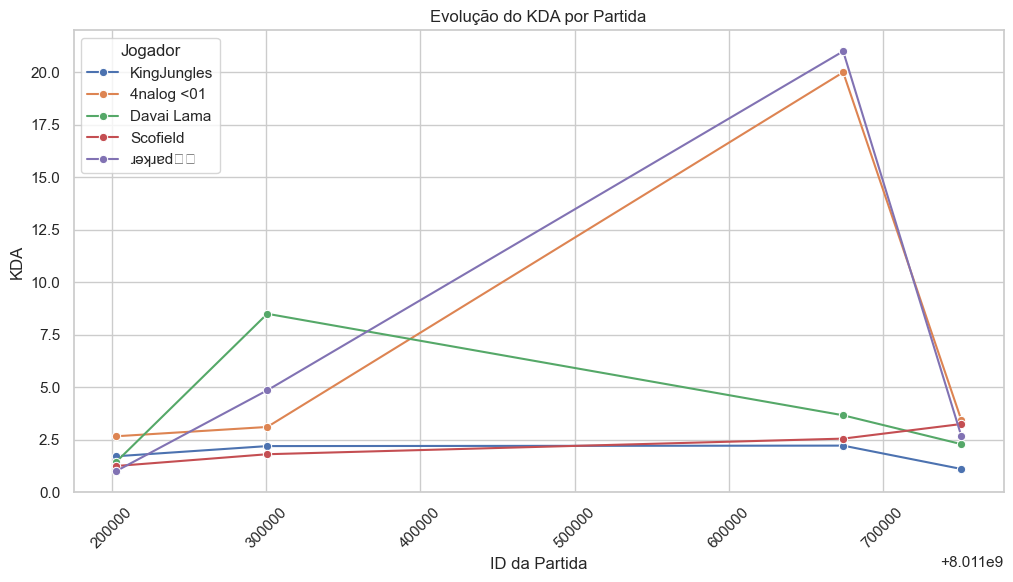

In [47]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='match_id', y='kda', hue='player_name', marker='o')

plt.title("Evolução do KDA por Partida")
plt.xlabel("ID da Partida")
plt.ylabel("KDA")
plt.legend(title="Jogador")
plt.xticks(rotation=45)
plt.show()

C:\Users\lucas\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9876 (\N{CROSSED SWORDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lucas\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


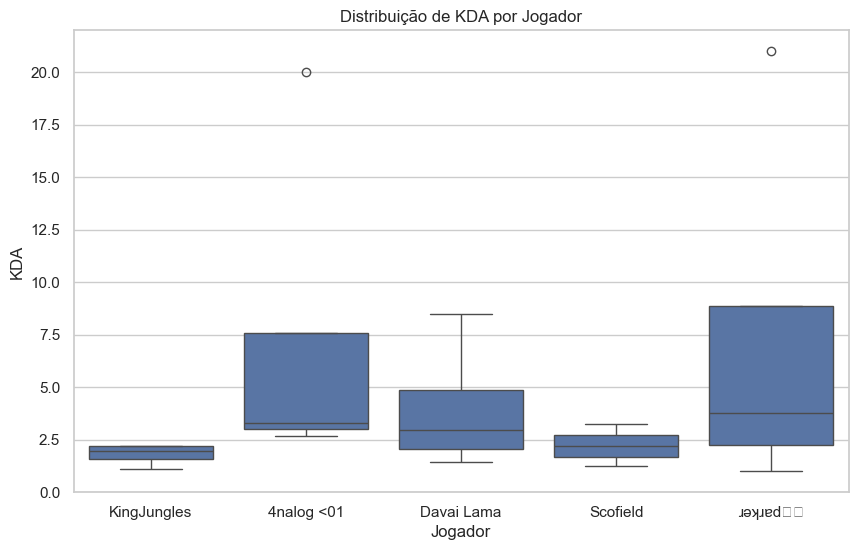

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='player_name', y='kda')
plt.title("Distribuição de KDA por Jogador")
plt.xlabel("Jogador")
plt.ylabel("KDA")
plt.show()

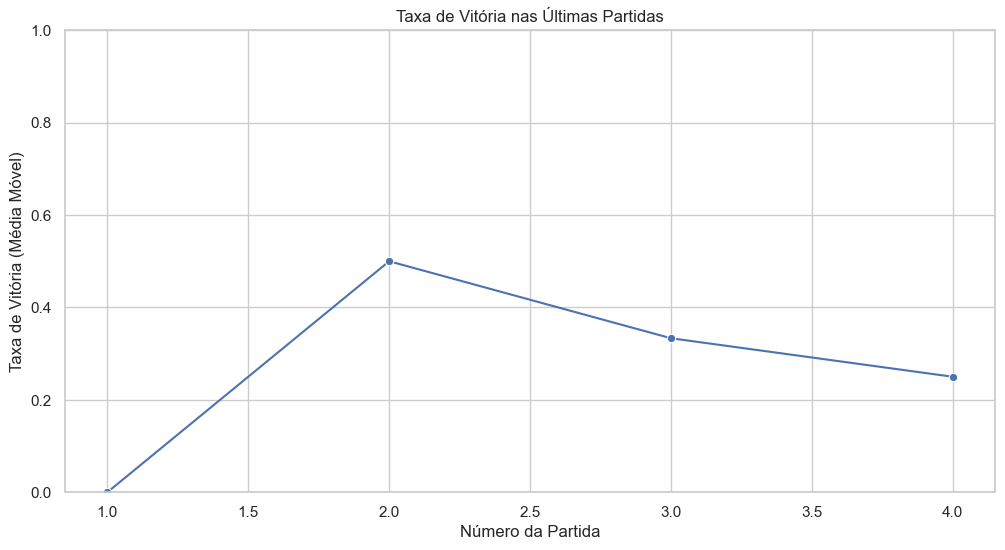

In [49]:
df = pd.DataFrame({'win_result': match_results})
df['match_number'] = range(1, len(df) + 1) 
df['moving_win_rate'] = df['win_result'].rolling(window=5, min_periods=1).mean()  

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='match_number', y='moving_win_rate', marker='o', color='b')
plt.title("Taxa de Vitória nas Últimas Partidas")
plt.xlabel("Número da Partida")
plt.ylabel("Taxa de Vitória (Média Móvel)")
plt.ylim(0, 1) 

plt.show()